BUKIRWA LORITAH

J24M19/003

PART C:
Dataset 1
(Dataset Source: https://wheeloffortuneanswer.com/) This dataset contains information about
various puzzle categories like "Around the House", "Before and After", "Book Title", and many
more.

1. Generate a python script that you can use to scrap the provided website to access the data.
Save your data as ‘Your_Last_name.csv’ file (e.g. Aine.csv).

2. Generate a visual to depict the “Word To Guess” variable in the above dataset [5 MARKS]

In [15]:
#import the necessary libraries
import requests
from bs4 import BeautifulSoup
import csv
import time
import pandas as pd

#define headers to mimic a browser visit
headers = {'User-Agent': 'Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

#specify the url
url = 'https://wheeloffortuneanswer.com/'

#send a get request to the url
response = requests.get(url, headers=headers)

# Checking if request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print(f"Request failed with status code: {response.status_code}") #print an error message if request was not successful
    exit() #exit the program if request was not successful

#finding the table in the html
table = soup.find('table')

#extracting the "Category" column
categories = []
for row in soup.find_all("td", class_="column-1"):  
    category = row.text.strip()  # Extracting the text and cleaning it
    categories.append([category]) #appending the extracted data to the categories list

#creating a datafreame for the extracted data
puzzles = pd.DataFrame(categories, columns=["Category(Full Answer)"])

#saving the data to a csv file
csv_file = 'Bukirwa.csv'
puzzles.to_csv(csv_file, index=False)
print(f"Data saved to {csv_file}")

#display the data
print(puzzles.head(5)) #the first 5 rows of the data

Data saved to Bukirwa.csv
      Category(Full Answer)
0          Around the House
1          Before and After
2  Book Title (Best Seller)
3             Classic Movie
4                Classic TV


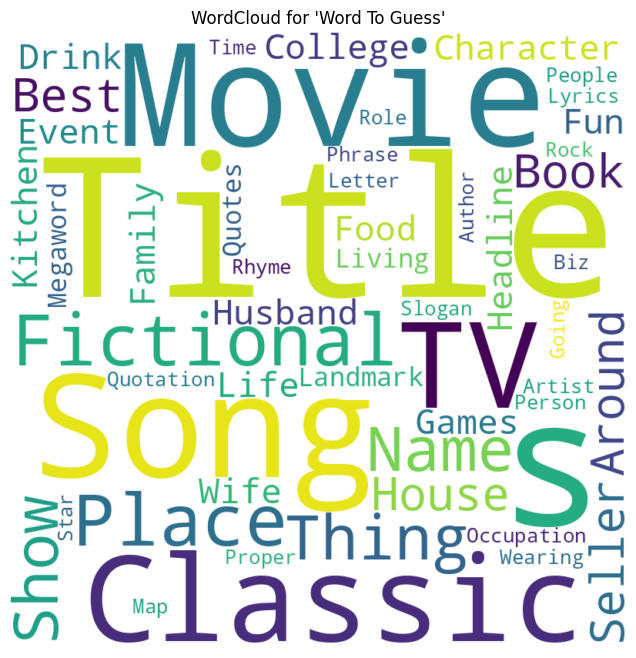

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#load scraped data 
data = pd.read_csv('Bukirwa.csv')

#combine all 'Word To Guess' into one string
text = " ".join(data["Category(Full Answer)"].values)

#generate word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color='white').generate(text)

#plot word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for 'Word To Guess'")
plt.show()

DATASET 2 DESCRIPTION

The European news.csv dataset provided contains news articles published by a European news
agency over several years. The news articles are classified under particular ‘labels’ to help
identify them.

3. Generate visual(s) that would best present the news article to a wide audience. [10 MARKS]

4. Generate a natural language processing algorithm that would best classify the news
articles.

In [ ]:
#question 3
#load the dataset
news = pd.read_csv('C:/Users/Admin/OneDrive - MOGAS Kenya LIMITED/personal/UCU/Year 2/Sem 1/Data Mining, Modelling and Analytics/DSS8307 Exam Instructions amp Datasets-20250226/Bukirwa Loritah_Exam_J24M19_003/Part C/Part C/European news.csv')
news.head(5) #display the first 5 rows of the data

,Articles,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


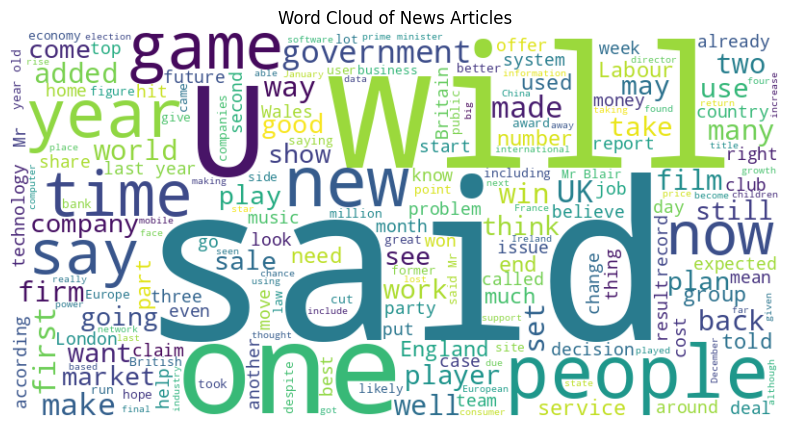

In [ ]:

# Generate a word cloud for the 'Articles' column
text = ' '.join(news['Articles'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud to visualize the most common words in the 'Articles' column
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Word Cloud of News Articles')
plt.show()

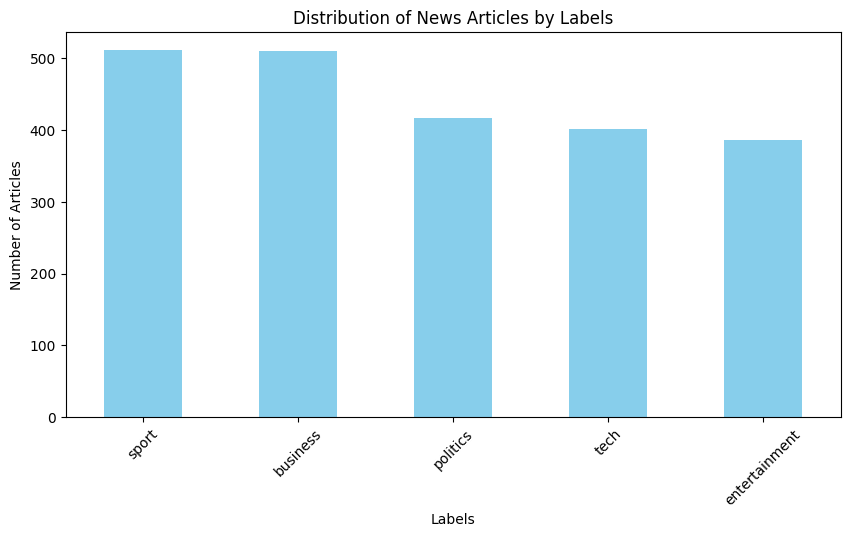

In [ ]:

# Generate a bar chart for the distribution of labels in the dataset
label_counts = news['labels'].value_counts()
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Articles')
plt.title('Distribution of News Articles by Labels')
plt.xticks(rotation=45)
plt.show()

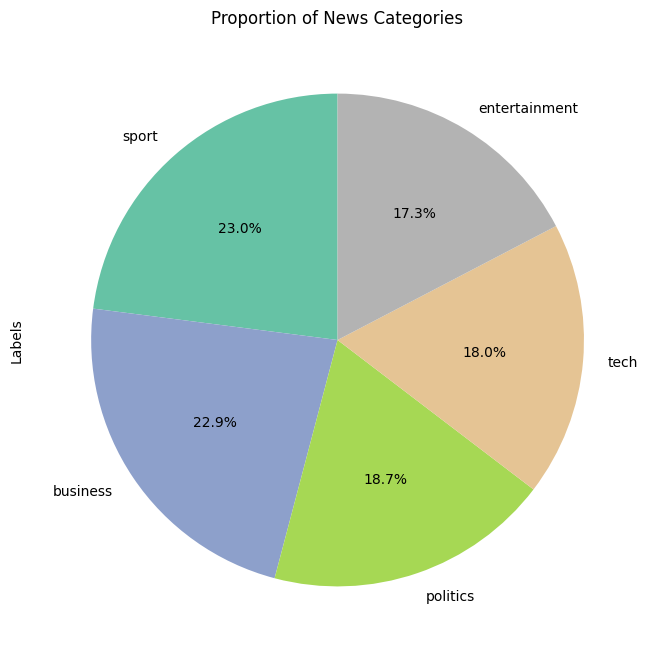

In [24]:
# Plot pie chart for the proportion of news categories in the dataset
plt.figure(figsize=(8, 8))
label_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Set2")

plt.ylabel("Labels")
plt.title("Proportion of News Categories")
plt.show()

In [25]:
#question 4 - Generate a natural language processing algorithm that would best classify the news articles.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#prepare the data
X = news['Articles']
y = news['labels']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#vectorize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)   #fitting the vectorizer to the training data
X_test_tfidf = vectorizer.transform(X_test)         #transforming the testing data

#train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

#make predictions
y_pred = model.predict(X_test_tfidf)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9887640449438202
Classification Report:
               precision    recall  f1-score   support

     business       0.97      1.00      0.99       103
entertainment       1.00      0.98      0.99        84
     politics       0.98      0.99      0.98        80
        sport       1.00      0.99      0.99        98
         tech       1.00      0.99      0.99        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



The model achieved an accuracy of 98.88%, indicating that it classifies news articles into business, entertainment, politics, sport, and tech categories with very high precision.